In [496]:
import numpy as np
import matplotlib.pyplot as plt

In [497]:
m=100
X1=np.random.uniform(10,20,m)

mu=250;
sigma=90;
def quad(X):
    return 4*X**2+3
X2=quad(X1)+np.random.normal(mu,sigma,m)



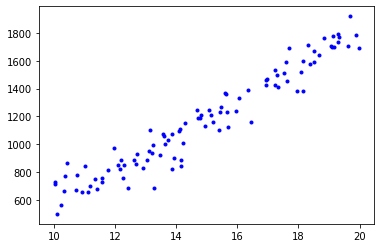

In [498]:
plt.plot(X1,X2,'b.')


In [499]:
x1=np.matrix(X1).T
x1.shape

(100, 1)

In [500]:
x1_con=np.concatenate([np.ones([m,1]),x1],1)

In [501]:
y=np.matrix(X2).T
y.shape

(100, 1)

In [502]:
theta_opt=np.linalg.inv(x1_con.T*x1_con)*x1_con.T*y

In [503]:
theta_opt

matrix([[-639.67361237],
        [ 121.69601715]])

In [504]:
actualy=theta_opt.T*x1_con.T

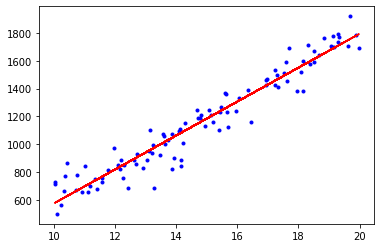

In [505]:
plt.plot(X1,X2,'b.')
plt.plot(X1,actualy.T,'r-')

In [506]:
def h(theta,x):
    return theta.T*x

def cost(theta,x, y):
    c=h(theta, x)-y
    cost=c*c.T
    return cost

In [507]:
cost1=cost(theta_opt,x1_con.T, y.T)

In [508]:
print("cost in new theta: ",cost1)


cost in new theta:  [[904342.30991321]]


# Separating training and test data

In [509]:
indices=np.random.permutation(X1.shape[0])
train_index, test_index=indices[:80],indices[80:]
X1_training,X1_testing=np.matrix(X1[train_index]).T,np.matrix(X1[test_index]).T
X2_training,X2_testing=X2[train_index],X2[test_index]


In [510]:
x1_train_con=np.concatenate([np.ones([80,1]),X1_training],1)
x1_test_con=np.concatenate([np.ones([20,1]),X1_testing],1)

In [511]:
y_train=np.matrix(X2_training).T
y_test=np.matrix(X2_testing).T


In [512]:
theta_opt_train=np.linalg.inv(x1_train_con.T*x1_train_con)*x1_train_con.T*y_train

In [513]:
actual_train_y=theta_opt_train.T*x1_train_con.T
actual_test_y=theta_opt_train.T*x1_test_con.T

************************Training in blue points, testing in red points, training testing both overlaps, data plot***************************


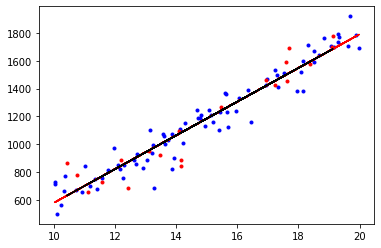

In [514]:
print("************************Training in blue points, testing in red points, training testing both overlaps, data plot***************************")
plt.plot(X1_training,X2_training,'b.')
plt.plot(X1_training,actual_train_y.T,'r-')
plt.plot(X1_testing,X2_testing,'r.')
plt.plot(X1_testing,actual_test_y.T,'k-')


****************Testing data with trained plot********************


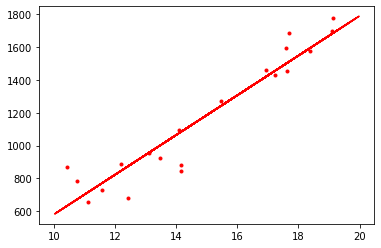

In [515]:
print("****************Testing data with trained plot********************")
plt.plot(X1_testing,X2_testing,'r.')
plt.plot(X1_training,actual_train_y.T,'r-')



In [516]:
cost_train=cost(theta_opt_train,x1_train_con.T, y_train.T)
print(cost_train)
cost_test=cost(theta_opt_train, x1_test_con.T,y_test.T)
print(cost_test)

[[637076.92122483]]
[[267806.24998965]]


## Solving by quadratic ( 1   X1  X1^2)

In [517]:
X_quad=np.matrix([X1, np.square(X1)]).T

In [518]:
X_quad_con=np.concatenate([np.ones([m,1]),X_quad],1)


In [519]:

theta_opt_quad=np.linalg.inv(X_quad_con.T*X_quad_con)*X_quad_con.T*y


In [520]:
actualy_quad=theta_opt_quad.T*X_quad_con.T

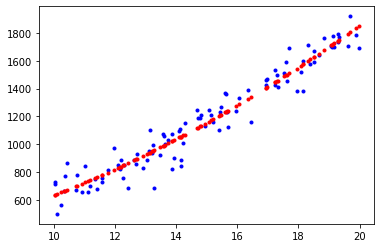

In [521]:
plt.plot(np.array([X1]).T,np.array([X2]).T,'b.')
plt.plot(np.array([X1]).T,actualy_quad.T,'r.')

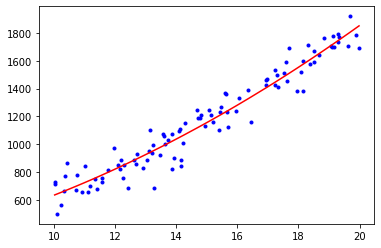

In [530]:

sorted_x=np.sort(X1)

sorted_y=np.sort(actualy_quad)

plt.plot(np.array([X1]).T,np.array([X2]).T,'b.')
plt.plot(sorted_x.T,sorted_y.T,'r-')
# plt.plot(X1.T,actualy_quad.T,'r-')

# Separating training and testing data


In [523]:

X1_quad_training,X1_quad_testing=np.matrix(X_quad[train_index]),np.matrix(X_quad[test_index])
X2_quad_training,X2_quad_testing=X2[train_index],X2[test_index]
X1_quad_training.shape

(80, 2)

In [524]:
x1_quad_train_con=np.concatenate([np.ones([80,1]),X1_quad_training],1)
x1_quad_test_con=np.concatenate([np.ones([20,1]),X1_quad_testing],1)
print(x1_quad_train_con.shape)

(80, 3)


In [525]:
y_quad_train=np.matrix(X2_quad_training).T
y_quad_test=np.matrix(X2_quad_testing).T

In [526]:
theta_quad_opt_train=np.linalg.inv(x1_quad_train_con.T*x1_quad_train_con)*x1_quad_train_con.T*y_quad_train

In [527]:
actual_quad_train_y=theta_quad_opt_train.T*x1_quad_train_con.T
actual_quad_test_y=theta_quad_opt_train.T*x1_quad_test_con.T

************************Training in blue points, testing in red points, training testing both overlaps, data plot***************************


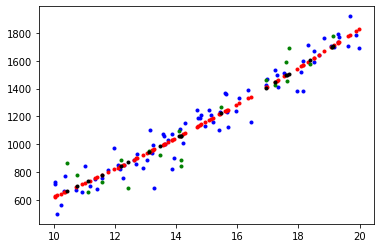

In [528]:
print("************************Training in blue points, testing in red points, training testing both overlaps, data plot***************************")
plt.plot(X1_training,X2_training,'b.')
plt.plot(X1_training,actual_quad_train_y.T,'r.')
plt.plot(X1_testing,X2_testing,'g.')
plt.plot(X1_testing,actual_quad_test_y.T,'k.')

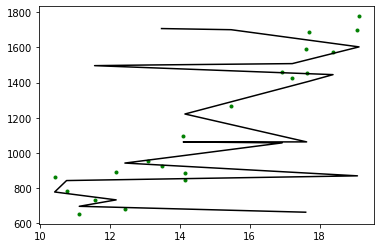

In [538]:
plt.plot(X1_testing,X2_testing,'g.')
plt.plot(np.sort(X1_testing),np.sort(actual_quad_test_y).T,'k-')